<a href="https://colab.research.google.com/github/abosedealli/SIT723UNIT_STOCK_-PREDICTION_AR_ARIMA_LSTM_LR-/blob/main/.......LSTM_netflix_6month_data%20to%20predict_future_30days.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pmdarima
import numpy as np
!pip install tensorflow
import tensorflow as tf
import random
!pip inatall pandas 
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from keras.layers import *
from keras.callbacks import EarlyStopping 

from datetime import datetime
xapp= pd.read_csv("/content/newntflixs.csv")
xapp.shape
data = xapp.iloc[:int(0.8*len(xapp))]
print(data.shape)
data.info()
data



data.drop(["Date"],axis=1,inplace=True)

Netflix= data.assign(**{'average': lambda df: df.loc[:,['Open','High','Low','Close']].mean(axis=1), 
                    'EMA20': lambda df: df['average'].ewm(span=20, adjust=False).mean(), 
                    'EMA5': lambda df: df['average'].ewm(span=5, adjust=False).mean(), 
                    'dist_EMA20': lambda df: (df['average'] - df['EMA20'])/df['EMA20']*100, 
                    'dist_EMA5': lambda df: (df['average'] - df['EMA5'])/df['EMA5']*100})
Netflix.head()
     


testdata=  data.iloc[int(0.8*len(data)):]
testdata.info()


testdata.head()
#testdf.drop(["Date"],axis=1,inplace=True)
scalar = MinMaxScaler()
Netflix_scaled = scalar.fit_transform(data)
print(Netflix_scaled.shape)
Netflix_scaled

X_train = []
y_train = []
for i in range(30, Netflix.shape[0]):
    X_train.append(Netflix_scaled[i-30: i])
    y_train.append(Netflix_scaled[i, 0])

X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape
X_train, y_train = np.array(X_train), np.array(y_train)
X_train.shape, y_train.shape

model = Sequential()
model.add(LSTM(50, return_sequences=True,  activation = 'relu',input_shape=(X_train.shape[1], 6)))
model.add(LSTM(50))
model.add(Dense(1))
model.add(Dropout(0.2))

model.compile(optimizer='adam', loss='mean_squared_error')

# fit the model to the training data
model.fit(X_train, y_train,batch_size=32)




     

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 33.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 68.7 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.12.2
    Uninstalling statsmodels-0.12.2:
      Successfully uninstalled statsmodels-0.12.2
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: unknown command "inatall" - maybe you meant "install"
(101, 7)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       101 non-null    object 
 1   Open       101 non-null    float64
 2   High       101 non-null    float64
 3   Low        101 non-null    float64
 4   Close      101 non-null    float64
 5   Adj Close 

/usr/local/lib/python3.8/dist-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


3/3 [==============================] - 4s 32ms/step - loss: 0.2950


In [2]:
past_30 = data.tail(30)

dt = past_30.append(testdata, ignore_index = True)


In [3]:
inputs = scalar.fit_transform(dt)
print(inputs.shape)
inputs

(51, 6)


array([[0.01655528, 0.        , 0.00990426, 0.        , 0.        ,
        0.16586219],
       [0.        , 0.12129384, 0.        , 0.13030334, 0.13030334,
        0.27843334],
       [0.25820052, 0.1699237 , 0.19351329, 0.10220534, 0.10220534,
        0.22374518],
       [0.22334192, 0.29481134, 0.24673488, 0.27124154, 0.27124154,
        0.36628652],
       [0.38159384, 0.29986522, 0.28297783, 0.22377703, 0.22377703,
        0.48297486],
       [0.53789201, 0.62477532, 0.55431012, 0.576626  , 0.576626  ,
        1.        ],
       [0.617892  , 0.61444307, 0.59479773, 0.52938542, 0.52938542,
        0.27106691],
       [0.5785091 , 0.75336935, 0.58717897, 0.76905853, 0.76905853,
        0.4610264 ],
       [0.79732657, 0.75044921, 0.74695252, 0.68935414, 0.68935414,
        0.17510546],
       [0.76359907, 0.83018872, 0.80343928, 0.78529028, 0.78529028,
        0.21898012],
       [0.79537282, 0.92048533, 0.83054008, 0.87036813, 0.87036813,
        0.2341482 ],
       [0.88061681, 0

In [4]:

X_test = []
y_test = []

for i in range(30, inputs.shape[0]):
    X_test.append(inputs[i-30:i])
    y_test.append(inputs[i, 0])
    
X_test, y_test = np.array(X_test), np.array(y_test).reshape(-1,1)
X_test.shape, y_test.shape

((21, 30, 6), (21, 1))

In [5]:
dt

,Open,High,Low,Close,Adj Close,Volume
0,214.300003,223.669998,212.639999,220.869995,220.869995,12952600
1,212.690002,234.470001,211.729996,232.509995,232.509995,17505000
2,237.800003,238.800003,229.509995,230.000000,230.000000,15293400
3,234.410004,249.919998,234.399994,245.100006,245.100006,21057800
4,249.800003,250.369995,237.729996,240.860001,240.860001,25776700
5,265.000000,279.299988,262.660004,272.380005,272.380005,46685300
6,272.779999,278.380005,266.380005,268.160004,268.160004,17207100
7,268.950012,290.750000,265.679993,289.570007,289.570007,24889100
8,290.230011,290.489990,280.359985,282.450012,282.450012,13326400
9,286.950012,297.589996,285.549988,291.019989,291.019989,15100700


In [6]:
y_pred = model.predict(X_test)

1/1 [==============================] - 1s 935ms/step


In [7]:
node = pd.isnull(y_pred).any(1).nonzero()[0]

In [8]:
y_pred = np.delete(y_pred,node)
y_test = np.delete(y_test,node)

In [9]:
ans = pd.DataFrame()
ans['y_pred'] = y_pred
ans['y_test'] = y_test    
     
ans = ans.dropna()
scale = 1/scalar.scale_[0]

In [10]:
y_pred = y_pred*scale
y_test = y_test*scale

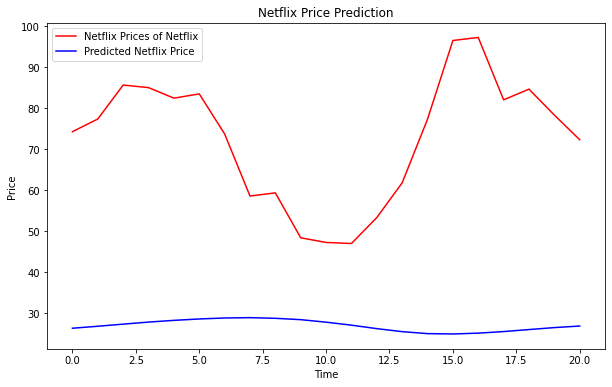

In [11]:
 #Visualising the results
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6))
plt.plot(y_test, color = 'red', label = 'Netflix Prices of Netflix')
plt.plot(y_pred, color = 'blue', label = 'Predicted Netflix Price')
plt.title('Netflix Price Prediction')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
#plt.show()

In [12]:
from sklearn.metrics import mean_squared_error
print(mean_squared_error(ans.y_test, ans.y_pred, squared = False))      
#If True returns MSE value, if False returns RMSE value.

0.4968254838165703


In [13]:
print(mean_squared_error(ans.y_test, ans.y_pred, squared = True))         


0.24683556136956916


In [ ]:
from sklearn.metrics import mean_absolute_error
mae= np.mean(np.abs(ans.y_pred - y_test))
from keras.metrics.metrics import mean_absolute_percentage_error
mape = (np.mean(np.abs(ans.y_pred - y_test) /y_test))

print("MAE:", mae)
print("MAPE:", mape)

MAE: 72.04388017769095
MAPE: 0.9911159395395831
